In [14]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [16]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [17]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [18]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [19]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [20]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

vestmannaeyjar is
busselton au
kailua us
chokurdakh ru
kodiak us
vaini to
jamestown sh
boa vista br
meyungs pw
qaanaaq gl
bluff nz
jamestown sh
voh nc
hithadhoo mv
banjar id
bluff nz
taoudenni ml
vaini to
podhum ba
qaanaaq gl
ushuaia ar
rikitea pf
fortuna us
urayasu jp
lillooet ca
cape town za
villazon bo
ketchikan us
bredasdorp za
kapaa us
nelson bay au
cururupu br
brigantine us
chagda ru
saurimo ao
havre-saint-pierre ca
sibolga id
bolshoy tsaryn ru
bluff nz
rikitea pf
butaritari ki
punta arenas cl
bubaque gw
bosaso so
port elizabeth za
belushya guba ru
thompson ca
severo-kurilsk ru
mucuri br
deputatskiy ru
khormuj ir
roald no
albany au
kamenskoye ru
yulara au
filadelfia py
sumbawanga tz
hermanus za
geraldton ca
palabuhanratu id
tuktoyaktuk ca
saint-philippe re
auki sb
carnarvon au
taolanaro mg
isangel vu
guerrero negro mx
qaanaaq gl
coolum beach au
skalistyy ru
busselton au
cabedelo br
puerto ayora ec
port macquarie au
isangel vu
moa cu
tiksi ru
ushuaia ar
kodiak us
los llanos de ari

san quintin mx
pundaguitan ph
albany au
georgetown sh
porto santo pt
lebu cl
port alfred za
yanam in
cape town za
bluff nz
salinopolis br
komsomolskiy ru
jamestown sh
longyearbyen sj
ushuaia ar
krasnogorodsk ru
lebu cl
toamasina mg
tsihombe mg
loiza us
saint george bm
qaqortoq gl
kungurtug ru
hobyo so
nerchinskiy zavod ru
chokurdakh ru
barentsburg sj
ushuaia ar
sergeyevka kz
vaini to
ushuaia ar
mogadishu so
butaritari ki
dudinka ru
belushya guba ru
mataura pf
avarua ck
hasaki jp
tasiilaq gl
vaini to
faanui pf
east london za
lompoc us
gamba ga
umzimvubu za
rikitea pf
kruisfontein za
walvis bay na
namibe ao
batagay ru
hokitika nz
port alfred za
barentsburg sj
nemuro jp
tasiilaq gl
vaini to
plettenberg bay za
bengkulu id
hermanus za
faanui pf
asau tv
lima pe
rikitea pf
mataura pf
ziyamet cy
ushuaia ar
ushuaia ar
marawi sd
guerrero negro mx
mys shmidta ru
jamestown sh
kapaa us
dikson ru
provideniya ru
busselton au
taolanaro mg
ushuaia ar
cape town za
khatanga ru
ostrovnoy ru
meyungs pw
thi

hasaki jp
nizhneyansk ru
vaini to
puerto ayora ec
sentyabrskiy ru
mys shmidta ru
marzuq ly
thanh hoa vn
amderma ru
mys shmidta ru
belur in
samusu ws
saint-philippe re
vaini to
malanje ao
avarua ck
avarua ck
acapulco mx
norman wells ca
rikitea pf


In [21]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [22]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [25]:
import requests
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vestmannaeyjar
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | kailua
Processing Record 4 of Set 1 | chokurdakh
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | boa vista
Processing Record 9 of Set 1 | meyungs
City not found. Skipping...
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | voh
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | banjar
Processing Record 15 of Set 1 | taoudenni
Processing Record 16 of Set 1 | podhum
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | fortuna
Processing Record 20 of Set 1 | urayasu
Processing Record 21 of Set 1 | lillooet
Processing Record 22 of Set 1 | cape town
Processing Record 23 of Set 1 

Processing Record 35 of Set 4 | birjand
Processing Record 36 of Set 4 | boyolangu
Processing Record 37 of Set 4 | castro
Processing Record 38 of Set 4 | nome
Processing Record 39 of Set 4 | itarema
Processing Record 40 of Set 4 | bambous virieux
Processing Record 41 of Set 4 | saskylakh
Processing Record 42 of Set 4 | alugan
Processing Record 43 of Set 4 | tabou
Processing Record 44 of Set 4 | kroya
Processing Record 45 of Set 4 | ballina
Processing Record 46 of Set 4 | north bend
Processing Record 47 of Set 4 | lorengau
Processing Record 48 of Set 4 | torbay
Processing Record 49 of Set 4 | mendi
Processing Record 50 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 1 of Set 5 | komsomolskiy
Processing Record 2 of Set 5 | inuvik
Processing Record 3 of Set 5 | tasiilaq
Processing Record 4 of Set 5 | wajima
Processing Record 5 of Set 5 | petukhovo
Processing Record 6 of Set 5 | mahebourg
Processing Record 7 of Set 5 | najran
Processing Record 8 of Set 5 | tchollire
Process

Processing Record 26 of Set 8 | bathsheba
Processing Record 27 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 28 of Set 8 | languyan
Processing Record 29 of Set 8 | umm lajj
Processing Record 30 of Set 8 | dingle
Processing Record 31 of Set 8 | tak bai
Processing Record 32 of Set 8 | west wendover
Processing Record 33 of Set 8 | piacabucu
Processing Record 34 of Set 8 | canaries
Processing Record 35 of Set 8 | namatanai
Processing Record 36 of Set 8 | pundaguitan
Processing Record 37 of Set 8 | porto santo
Processing Record 38 of Set 8 | yanam
Processing Record 39 of Set 8 | salinopolis
Processing Record 40 of Set 8 | krasnogorodsk
Processing Record 41 of Set 8 | toamasina
Processing Record 42 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 43 of Set 8 | loiza
Processing Record 44 of Set 8 | qaqortoq
Processing Record 45 of Set 8 | kungurtug
Processing Record 46 of Set 8 | nerchinskiy zavod
Processing Record 47 of Set 8 | sergeyevka
Processing Re

Processing Record 13 of Set 12 | aitape
Processing Record 14 of Set 12 | maniitsoq
Processing Record 15 of Set 12 | tidore
City not found. Skipping...
Processing Record 16 of Set 12 | alexandria
Processing Record 17 of Set 12 | vao
Processing Record 18 of Set 12 | fort nelson
Processing Record 19 of Set 12 | kasempa
Processing Record 20 of Set 12 | shubarkuduk
Processing Record 21 of Set 12 | belmonte
Processing Record 22 of Set 12 | huanren
Processing Record 23 of Set 12 | pacific grove
Processing Record 24 of Set 12 | pizhanka
Processing Record 25 of Set 12 | artyk
City not found. Skipping...
Processing Record 26 of Set 12 | yagodnoye
Processing Record 27 of Set 12 | le port
Processing Record 28 of Set 12 | aklavik
Processing Record 29 of Set 12 | sauda
Processing Record 30 of Set 12 | marcona
City not found. Skipping...
Processing Record 31 of Set 12 | rungata
City not found. Skipping...
Processing Record 32 of Set 12 | falealupo
City not found. Skipping...
Processing Record 33 of S

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vestmannaeyjar,63.4427,-20.2734,45.82,99,100,7.38,IS,2022-04-03 01:12:26
1,Busselton,-33.6500,115.3333,71.02,84,92,12.91,AU,2022-04-03 01:12:26
2,Kailua,21.4022,-157.7394,84.18,74,9,10.00,US,2022-04-03 01:12:27
3,Chokurdakh,70.6333,147.9167,1.42,91,30,4.72,RU,2022-04-03 01:12:27
4,Kodiak,57.7900,-152.4072,40.51,75,40,4.61,US,2022-04-03 01:12:27
5,Vaini,-21.2000,-175.2000,86.16,74,40,5.75,TO,2022-04-03 01:12:28
6,Jamestown,42.0970,-79.2353,39.52,62,0,6.91,US,2022-04-03 01:12:28
7,Boa Vista,2.8197,-60.6733,85.98,54,75,9.22,BR,2022-04-03 01:08:20
8,Qaanaaq,77.4840,-69.3632,8.56,75,25,7.14,GL,2022-04-03 01:12:29
9,Bluff,-46.6000,168.3333,58.19,71,92,18.23,NZ,2022-04-03 01:12:29


In [30]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [33]:
city_data_df = city_data_df[new_column_order]

In [34]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vestmannaeyjar,IS,2022-04-03 01:12:26,63.4427,-20.2734,45.82,99,100,7.38
1,Busselton,AU,2022-04-03 01:12:26,-33.6500,115.3333,71.02,84,92,12.91
2,Kailua,US,2022-04-03 01:12:27,21.4022,-157.7394,84.18,74,9,10.00
3,Chokurdakh,RU,2022-04-03 01:12:27,70.6333,147.9167,1.42,91,30,4.72
4,Kodiak,US,2022-04-03 01:12:27,57.7900,-152.4072,40.51,75,40,4.61
...,...,...,...,...,...,...,...,...,...
556,Juneau,US,2022-04-03 01:27:25,58.3019,-134.4197,44.60,85,100,23.02
557,Narasannapeta,IN,2022-04-03 01:27:25,18.4167,84.0500,78.85,89,49,8.88
558,Thanh Hoa,VN,2022-04-03 01:27:26,19.8000,105.7667,62.96,65,100,6.62
559,Belur,IN,2022-04-03 01:27:26,13.1667,75.8667,68.25,78,9,0.58


In [35]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [36]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

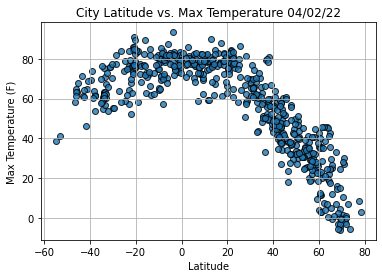

In [38]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

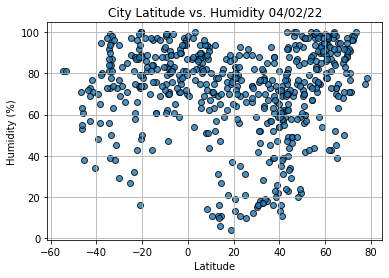

In [39]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

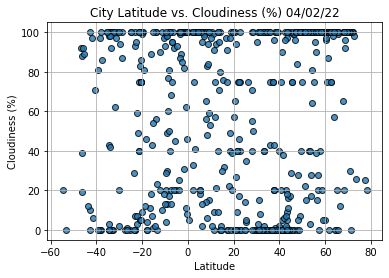

In [40]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

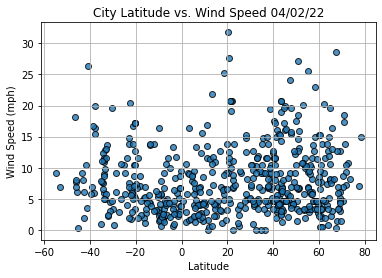

In [41]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [43]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [44]:
index13 = city_data_df.loc[13]

In [45]:
index13

City                    Taoudenni
Country                        ML
Date          2022-04-03 01:12:30
Lat                       22.6783
Lng                       -3.9836
Max Temp                    81.25
Humidity                       11
Cloudiness                      0
Wind Speed                   6.67
Name: 13, dtype: object

In [46]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
556     True
557     True
558     True
559     True
560    False
Name: Lat, Length: 561, dtype: bool

In [47]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vestmannaeyjar,IS,2022-04-03 01:12:26,63.4427,-20.2734,45.82,99,100,7.38
2,Kailua,US,2022-04-03 01:12:27,21.4022,-157.7394,84.18,74,9,10.00
3,Chokurdakh,RU,2022-04-03 01:12:27,70.6333,147.9167,1.42,91,30,4.72
4,Kodiak,US,2022-04-03 01:12:27,57.7900,-152.4072,40.51,75,40,4.61
6,Jamestown,US,2022-04-03 01:12:28,42.0970,-79.2353,39.52,62,0,6.91


In [48]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

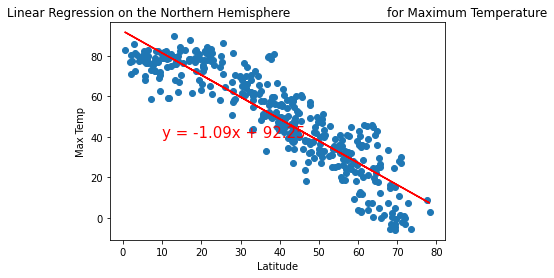

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

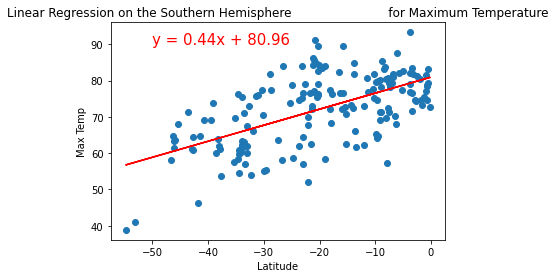

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

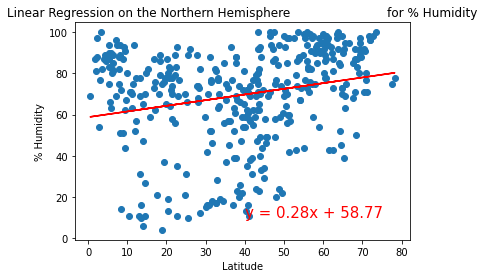

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

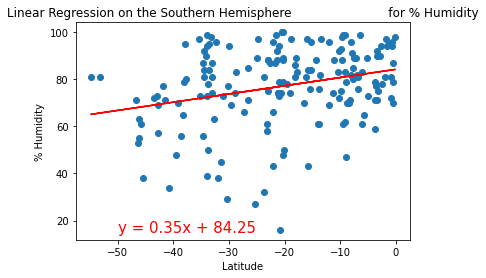

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

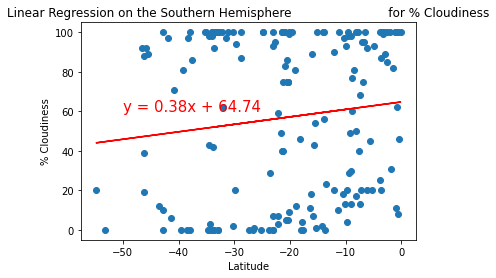

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

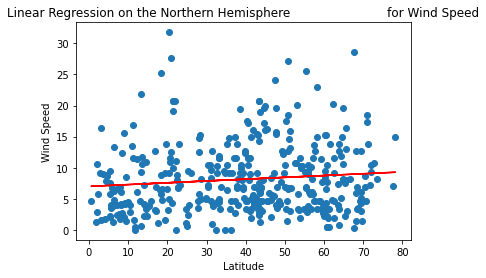

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

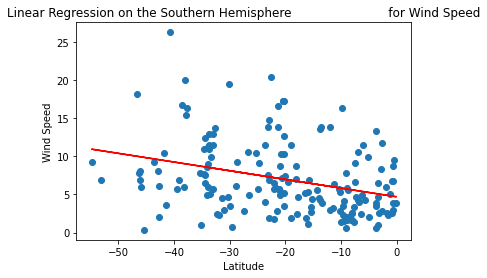

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))